<a href="https://colab.research.google.com/github/syahmishamz/Data-Analytics-ML/blob/main/Solutions/ITS69304_Group1_GroupAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Clone GitHub repo

In [53]:
!git clone https://github.com/syahmishamz/Data-Analytics-ML.git

fatal: destination path 'Data-Analytics-ML' already exists and is not an empty directory.


Load the dataset

In [3]:
file = '/content/Data-Analytics-ML/mentalhealth.csv'

#Question 1

##a)

Assign the file into a dataframe

In [4]:
data = pd.read_csv(file)
data.head(20)

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
5,5,"every break, you must be nervous, like somethi...",Anxiety
6,6,"I feel scared, anxious, what can I do? And may...",NaN
7,7,Have you ever felt nervous but didn't know why?,NaN
8,8,"I haven't slept well for 2 days, it's like I'm...",NaN
9,9,"I'm really worried, I want to cry.",Anxiety


In [5]:
data.describe() #Show descriptive statistics

,Unnamed: 0,statement,status
count,53044,52681,53016
unique,53044,51069,7
top,0,what do you mean?,Normal
freq,1,22,16348


In [6]:
data.columns #Show variable names

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [7]:
data.info() #Basic info on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53048 entries, 0 to 53047
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53044 non-null  object
 1   statement   52681 non-null  object
 2   status      53016 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [ ]:
data.shape #Number of records and variables (rows, columns)

(53048, 3)

In [16]:
print("Missing values:\n",data.isnull().sum()) #Check for number of missing values

Missing values:
 Unnamed: 0      4
statement     367
status         32
dtype: int64


In [18]:
clean_data = data.drop(data.columns[0], axis=1) #Drop first column ("Unnamed: 0")
clean_data.head(10)

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
5,"every break, you must be nervous, like somethi...",Anxiety
6,"I feel scared, anxious, what can I do? And may...",NaN
7,Have you ever felt nervous but didn't know why?,NaN
8,"I haven't slept well for 2 days, it's like I'm...",NaN
9,"I'm really worried, I want to cry.",Anxiety


In [22]:
clean_data.shape

(53048, 2)

In [23]:
clean_data.isnull().sum()

,0
statement,367
status,32


In [26]:
#Replace missing values in statement variable with "Unknown"
clean_data.fillna({"statement": "Unknown"}, inplace=True)

In [27]:
clean_data.isnull().sum()

,0
statement,0
status,32


In [30]:
#Replace missing values in status variable with most frequent category
clean_data["status"].fillna(clean_data["status"].mode()[0], inplace=True)

In [31]:
clean_data.isnull().sum()

,0
statement,0
status,0


In [32]:
clean_data.shape

(53048, 2)

In [33]:
clean_data.head(10)

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
5,"every break, you must be nervous, like somethi...",Anxiety
6,"I feel scared, anxious, what can I do? And may...",Normal
7,Have you ever felt nervous but didn't know why?,Normal
8,"I haven't slept well for 2 days, it's like I'm...",Normal
9,"I'm really worried, I want to cry.",Anxiety


##b)

Number of categories of status variable in ascending order

In [37]:
status_count = clean_data.status.value_counts().sort_values()
status_count

,count
status,
Personality disorder,1199
Stress,2669
Bipolar,2873
Anxiety,3881
Suicidal,10647
Depression,15399
Normal,16380


Visualise status variable on a chart

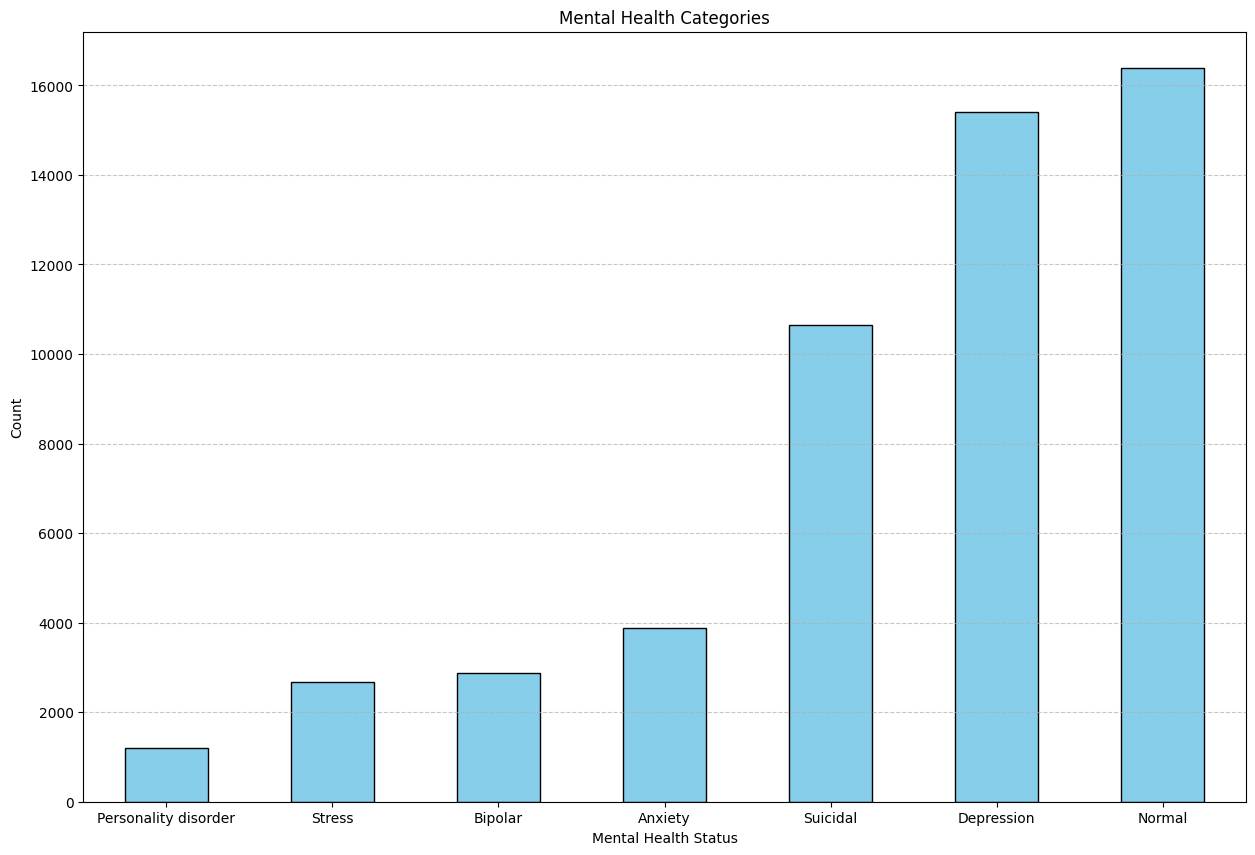

In [45]:
plt.figure(figsize=(15, 10))
status_count.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Mental Health Status")
plt.ylabel("Count")
plt.title("Mental Health Categories")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Convert status to binary classification

In [49]:
clean_data["status"] = clean_data["status"].apply(lambda x: "Normal" if x == "Normal" else "Depression")
status_count= clean_data["status"].value_counts().sort_values()
status_count

,count
status,
Normal,16380
Depression,36668


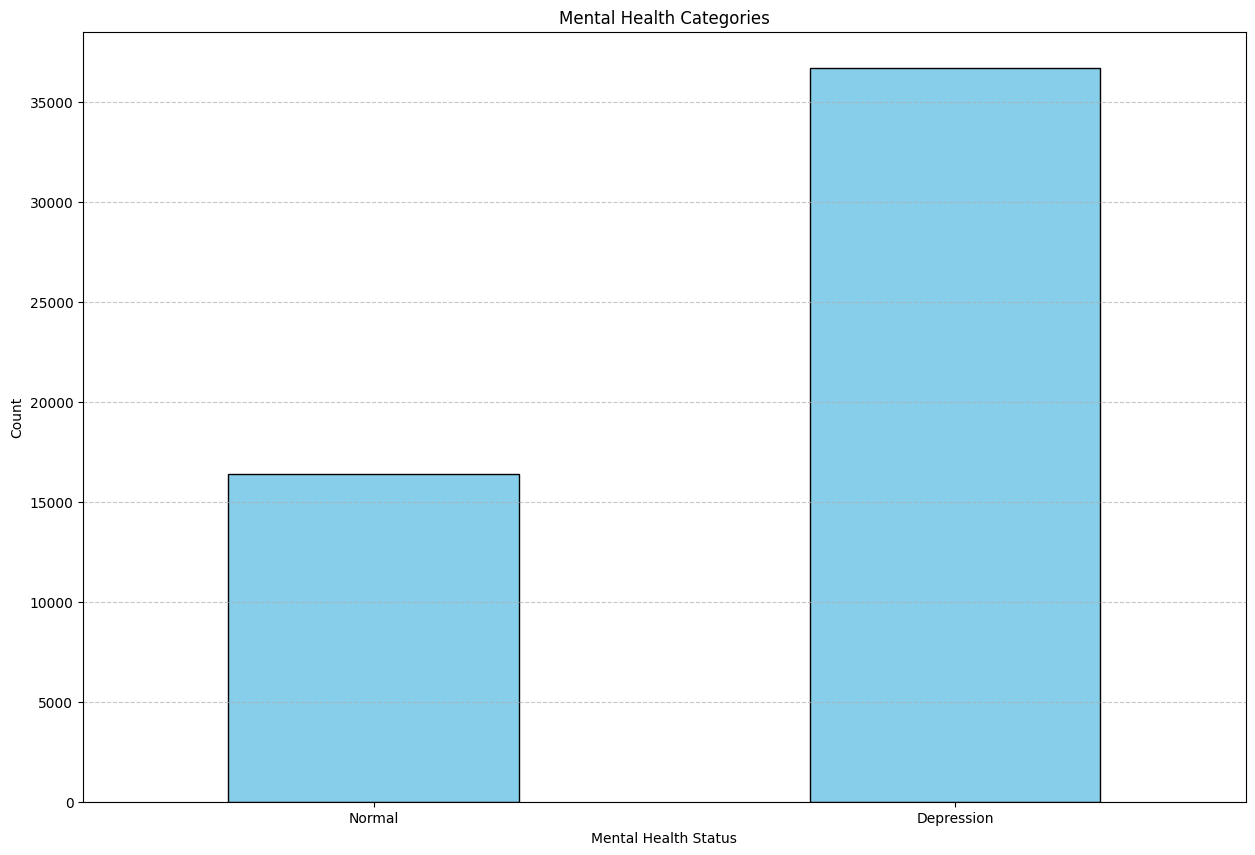

In [50]:
plt.figure(figsize=(15, 10))
status_count.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Mental Health Status")
plt.ylabel("Count")
plt.title("Mental Health Categories")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#Question 2

##a)

##b)

#Question 3

##a)

##b)

#Question 4

##a)